### Задание 1

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [4]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [61]:
t1_r2 = r2_score(y_test, y_pred)
t1_r2

0.711226005748496

### Задание 2

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfr = RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [62]:
rfr.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [63]:
y_pred = rfr.predict(X_test)
t2_r2 = r2_score(y_test, y_pred)
t2_r2

0.8749965273218174

In [66]:
print('lr лучше') if 1 - t1_r2 < 1 - t2_r2 else print('rfr лучше')

rfr лучше


In [67]:
# Модель rfr на основе RandomForestRegressor получилась лучше, так как r2 ближе к 1

### Задание 3

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InLineBackend.figure_format = 'svg'

In [113]:
f_imps = {}
for i, f_imp in enumerate(rfr.feature_importances_):
    fi_list = []
    fi_list.append(f_imp)
    f_imps[f'{X.columns[i]}'] = fi_list
fi_df = pd.DataFrame.from_dict(f_imps, orient='index', columns=['Feature Value'])
fi_df

,Feature Value
CRIM,0.032117
ZN,0.001550
INDUS,0.007094
CHAS,0.001149
NOX,0.014368
RM,0.402705
AGE,0.014245
DIS,0.064033
RAD,0.004968
TAX,0.011692


#### Признаки с наибольшей важностью

In [118]:
fi_df.sort_values(by='Feature Value', ascending=False).head(2)

,Feature Value
LSTAT,0.415679
RM,0.402705


Text(0, 0.5, 'Features')

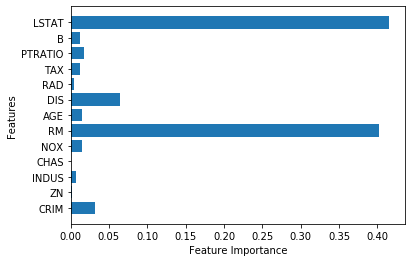

In [120]:
plt.barh(X.columns, rfr.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')